In [17]:
# Import dependencies
import pandas as pd
import numpy as np
import random
import requests
import json
import matplotlib.pyplot as plt
from citipy import citipy

In [18]:
# Openweather API key
weather_api_key = "b95c280d1f3f2e78d848e1a79ab177a8"

In [19]:
# Generate sample set of random latitudes and longitudes
# Lat = -90 to 90
# Lon = -180 t0 180

random_latas = np.random.uniform(low=-90, high=90, size=500)
random_longs = np.random.uniform(low=-180, high=180, size=500)

# print("Random latitudes:" + str(random_latas))
# print("Random longitudes:" + str(random_longs))

In [20]:
# Zip longitudes and Latitudes arrays to get the coordinates
coordinates = list(zip(random_latas, random_longs))

# Print the coordinates together
# coordinates

In [21]:
#Find the nearest city corresponding to the above coordinates

# Define empty lists for contries and cities
world_cities = []
countries = []

# Create a for loop to loop through the coordinate pairs to the nearest city with
# those lats and lons to get a country and city
for coordinate_pair in coordinates:
    random_latas, random_longs = coordinate_pair
    name = citipy.nearest_city(random_latas,random_longs).city_name
    country_code = citipy.nearest_city(random_latas,random_longs).country_code
    countries.append(country_code)
    world_cities.append(name)

In [22]:
# Display the country, city, lat, and lon as a dataframe
WorldCities_data = pd.DataFrame({"Country":countries,"City":world_cities})
WorldCities_data = WorldCities_data[["Country", "City"]]

# print the dataframe
WorldCities_data

,Country,City
0,cl,lebu
1,us,lompoc
2,ru,belushya guba
3,ar,ushuaia
4,ck,avarua
5,ve,guatire
6,pf,rikitea
7,nz,tuatapere
8,pf,mataura
9,ws,saleaula


In [23]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [24]:
# Get weather data from Openweather
# IMPORTANT, YOU SHOULD IMPLEMENT ERROR HANDLING EARLY ON!!!
# If no weather data is retrieved,code will start having errors
# because it doesn't know how to handle non-existing data (i.e., NaN),
# so error check for this and add code to handle if encountered

# Set empty list to hold weather data
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Create a loop that gets the city and country (JSON format) from the list of cities 
for index, row in WorldCities_data.iterrows():
        
# Get values for cities from Openweather API
# Put error-handling code
    response = requests.get(query_url + row["City"] + "," + row["Country"]).json()
    
    try:
        lat.append(response['coord']['lon'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        lat.append(None)
        lon.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)

In [25]:
# Zip weather data into one list data from above 
weather_data = list(zip(lat,lon,temp,humidity,cloudiness, wind_speed))

# Print weather data that was retrieved
# weather_data

In [26]:
# Create dataframe with weather data with specific columns
df = pd.DataFrame(weather_data, columns = ["Lat","Lon","Temp","Humidity","Cloudiness","Wind Speed"])

# Print the dataframe
df.head()

,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed
0,-73.65,-73.65,15.17,92.0,8.0,5.65
1,-120.46,-120.46,16.50,67.0,20.0,6.70
2,NaN,NaN,NaN,NaN,NaN,NaN
3,-68.31,-68.31,6.85,93.0,75.0,3.60
4,-159.78,-159.78,25.00,88.0,75.0,1.00


In [27]:
# Create a new dataframe that merges country and city with weather data
all_weather_df = WorldCities_data.append(df)

# Print in order you want to see it
all_weather_df =all_weather_df[["Country", "City", "Temp", "Lat", "Lon", "Humidity", "Cloudiness", "Wind Speed"]]

# Print the combined dataframe
# NaN = Not a Number - handled above in error-handling
all_weather_df

,Country,City,Temp,Lat,Lon,Humidity,Cloudiness,Wind Speed
0,cl,lebu,NaN,NaN,NaN,NaN,NaN,NaN
1,us,lompoc,NaN,NaN,NaN,NaN,NaN,NaN
2,ru,belushya guba,NaN,NaN,NaN,NaN,NaN,NaN
3,ar,ushuaia,NaN,NaN,NaN,NaN,NaN,NaN
4,ck,avarua,NaN,NaN,NaN,NaN,NaN,NaN
5,ve,guatire,NaN,NaN,NaN,NaN,NaN,NaN
6,pf,rikitea,NaN,NaN,NaN,NaN,NaN,NaN
7,nz,tuatapere,NaN,NaN,NaN,NaN,NaN,NaN
8,pf,mataura,NaN,NaN,NaN,NaN,NaN,NaN
9,ws,saleaula,NaN,NaN,NaN,NaN,NaN,NaN


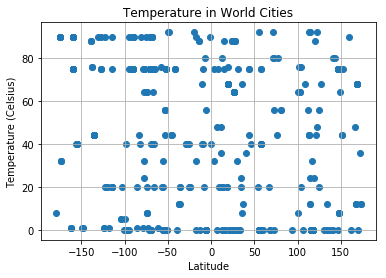

In [38]:
# Build a scatter plot for each data type from the all_weather dataframe
plt.scatter(all_weather_df["Lat"], all_weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

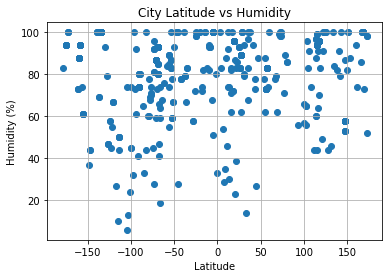

In [39]:
# Build a scatter plot for each data type
plt.scatter(all_weather_df["Lat"], all_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

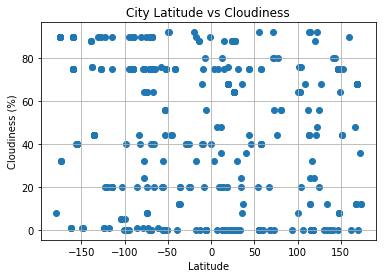

In [40]:
# Build a scatter plot for each data type
plt.scatter(all_weather_df["Lat"], all_weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

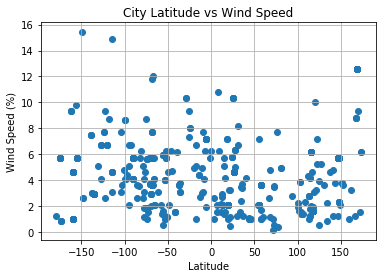

In [41]:
# Build a scatter plot for each data type
plt.scatter(all_weather_df["Lat"], all_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [42]:
# Export file as a CSV, without the Pandas index, but with the header
WorldCities_data.to_csv("../WorldCities_data.csv", encoding="utf-8", index=True, header=True) 
df.to_csv("../Country_City.csv", encoding="utf-8", index=True, header=True) 
all_weather_df.to_csv("../all_weather.csv", encoding="utf-8", index=False, header=True)